#Decision Tree Algorithm: Predicitng CVD risk


---


## Name: Alena Sanchez
## Professor Brahma - BSAN 6070 Final Project

### Import Packages

In [ ]:
from IPython.core.display import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from io import StringIO
import pydotplus
from sklearn.datasets import load_iris
import graphviz
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import seaborn as sns

#Exploratory Data Analysis and Data Quality Analysis

## Read Data

In [ ]:
url = 'https://raw.githubusercontent.com/alenasanchez/ML-Final-Project/main/CVDProjectData.csv'
data = pd.read_csv(url, encoding = "ISO-8859-1") 

In [ ]:
#data = pd.read_csv('CVDProjectData.csv')

In [ ]:
data.shape

(8023, 36)

In [ ]:
data.head()

ï»¿Census Tract  Total Population California County    ZIP  \
0       6083000103              3433     Santa Barbara  93105   
1       6083001500              2526     Santa Barbara  93108   
2       6037262301              2748       Los Angeles  90049   
3       6073008501              5969         San Diego  92117   
4       6057001204              2273           Nevada   96161   

                       Approximate Location  CES 4.0 Score  \
0  Unincorporated Santa Barbara County area           2.76   
1  Unincorporated Santa Barbara County area           2.46   
2                               Los Angeles           6.51   
3                                 San Diego           5.22   
4         Unincorporated Nevada County area           4.00   

   Pollution Burden Score  Asthma  Low Birth Weight  Cardiovascular Disease  \
0                    3.40   17.89              1.56                    4.48   
1                    2.48   11.87              0.00                    5.76   
2                    5.67   11.25              3.16                    6.47   
3                    4.21   22.74              2.49                    6.19   
4                    3.22   27.02              3.92                    5.46   

   ...  Asian American (%)  Other/Multiple (%)  Urban  LILATracts_1And10  \
0  ...                1.25                4.05      0                  0   
1  ...                3.25                0.99      1                  0   
2  ...               13.10                1.64      1                  0   
3  ...                5.85                5.98      1                  0   
4  ...                1.81                2.51      0                  0   

   LILATracts_halfAnd10  LILATracts_1And20  LILATracts_Vehicle  HUNVFlag  \
0                     0                  0                   0         0   
1                     0                  0                   0         0   
2                     0                  0                   0         0   
3                     0                  0                   0         0   
4                     0                  0                   0         0   

   LowIncomeTracts  LATractsVehicle_20  
0                0                   0  
1                0                   0  
2                0                   0  
3                0                   0  
4                0                   0  

[5 rows x 36 columns]

In [ ]:
data.tail()

ï»¿Census Tract  Total Population California County    ZIP  \
8018       6085504417               269       Santa Clara  95035   
8019       6095253000              6720           Solano   95687   
8020       6095980000                 0           Solano   94535   
8021       6109985202              2509         Tuolumne   95327   
8022       6111980000               118          Ventura      61   

                     Approximate Location  CES 4.0 Score  \
8018                             Milpitas            NaN   
8019                            Vacaville            NaN   
8020                            Fairfield            NaN   
8021  Unincorporated Tuolumne County area            NaN   
8022   Unincorporated Ventura County area            NaN   

      Pollution Burden Score  Asthma  Low Birth Weight  \
8018                    1.73   22.39               NaN   
8019                    3.65   77.03               NaN   
8020                    3.29   31.15               NaN   
8021                    3.22   68.79               NaN   
8022                    0.99   62.54               NaN   

      Cardiovascular Disease  ...  Asian American (%)  Other/Multiple (%)  \
8018                     8.4  ...               53.90                0.00   
8019                    15.2  ...                5.73                2.80   
8020                     7.8  ...                 NaN                 NaN   
8021                    22.8  ...                5.38                4.86   
8022                    15.2  ...                0.00                3.39   

      Urban  LILATracts_1And10  LILATracts_halfAnd10  LILATracts_1And20  \
8018      0                  0                     0                  0   
8019      1                  0                     0                  0   
8020      1                  0                     0                  0   
8021      0                  0                     0                  0   
8022      0                  0                     0                  0   

      LILATracts_Vehicle  HUNVFlag  LowIncomeTracts  LATractsVehicle_20  
8018                   0         0                0                   0  
8019                   0         0                0                   0  
8020                   0         0                0                   0  
8021                   0         0                0                   0  
8022                   0         0                0                   1  

[5 rows x 36 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8023 entries, 0 to 8022
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ï»¿Census Tract          8023 non-null   int64  
 1   Total Population         8023 non-null   int64  
 2   California County        8023 non-null   object 
 3   ZIP                      8023 non-null   int64  
 4   Approximate Location     8023 non-null   object 
 5   CES 4.0 Score            7931 non-null   float64
 6   Pollution Burden Score   8023 non-null   float64
 7   Asthma                   8023 non-null   float64
 8   Low Birth Weight         7807 non-null   float64
 9   Cardiovascular Disease   8023 non-null   float64
 10  Education                7931 non-null   float64
 11  Unemployment             7700 non-null   float64
 12  Housing Burden           7889 non-null   float64
 13  Pop. Char. Score         7931 non-null   float64
 14  PovertyRate             

In [ ]:
data.describe()

ï»¿Census Tract  Total Population           ZIP  CES 4.0 Score  \
count     8.023000e+03       8023.000000   8023.000000    7931.000000   
mean      6.054911e+09       4895.728530  92838.796211      28.285161   
std       2.653344e+07       2263.742516   3447.053588      16.505357   
min       6.001400e+09          0.000000     32.000000       1.030000   
25%       6.037264e+09       3473.000000  91604.000000      14.700000   
50%       6.059053e+09       4618.000000  92691.000000      25.500000   
75%       6.073016e+09       5933.000000  94558.000000      40.000000   
max       6.115041e+09      38754.000000  96161.000000      93.100000   

       Pollution Burden Score       Asthma  Low Birth Weight  \
count             8023.000000  8023.000000       7807.000000   
mean                 5.209211    51.978994          5.002991   
std                  1.555996    30.563883          1.587724   
min                  0.560000     4.280000          0.000000   
25%                  4.070000    30.060000          3.930000   
50%                  5.180000    45.710000          4.910000   
75%                  6.320000    65.800000          6.000000   
max                 10.000000   243.200000         13.700000   

       Cardiovascular Disease    Education  Unemployment  ...  \
count             8023.000000  7931.000000   7700.000000  ...   
mean                13.381861    17.242933      6.215844  ...   
std                  5.183537    14.458906      3.723913  ...   
min                  2.860000     0.000000      0.000000  ...   
25%                  9.450000     5.800000      3.600000  ...   
50%                 12.400000    12.000000      5.500000  ...   
75%                 16.700000    26.000000      8.000000  ...   
max                 40.800000    76.000000     43.000000  ...   

       Asian American (%)  Other/Multiple (%)        Urban  LILATracts_1And10  \
count         8011.000000         8011.000000  8023.000000        8023.000000   
mean            13.965309            3.266949     0.916365           0.066808   
std             15.639643            2.443140     0.276856           0.249705   
min              0.000000            0.000000     0.000000           0.000000   
25%              3.235000            1.395000     1.000000           0.000000   
50%              8.430000            2.850000     1.000000           0.000000   
75%             18.500000            4.700000     1.000000           0.000000   
max             94.500000           17.000000     1.000000           1.000000   

       LILATracts_halfAnd10  LILATracts_1And20  LILATracts_Vehicle  \
count           8023.000000        8023.000000         8023.000000   
mean               0.263866           0.061947            0.062944   
std                0.440755           0.241074            0.242877   
min                0.000000           0.000000            0.000000   
25%                0.000000           0.000000            0.000000   
50%                0.000000           0.000000            0.000000   
75%                1.000000           0.000000            0.000000   
max                1.000000           1.000000            1.000000   

          HUNVFlag  LowIncomeTracts  LATractsVehicle_20  
count  8023.000000      8023.000000         8023.000000  
mean      0.094104         0.431135            0.096223  
std       0.291992         0.495266            0.294916  
min       0.000000         0.000000            0.000000  
25%       0.000000         0.000000            0.000000  
50%       0.000000         0.000000            0.000000  
75%       0.000000         1.000000            0.000000  
max       1.000000         1.000000            1.000000  

[8 rows x 34 columns]

In [ ]:
data.describe(include='object')

California County Approximate Location
count               8023                 8023
unique                58                  785
top          Los Angeles          Los Angeles
freq                2333                  994

In [ ]:
data.isnull().sum()

ï»¿Census Tract               0
Total Population              0
California County             0
ZIP                           0
Approximate Location          0
CES 4.0 Score                92
Pollution Burden Score        0
Asthma                        0
Low Birth Weight            216
Cardiovascular Disease        0
Education                    92
Unemployment                323
Housing Burden              134
Pop. Char. Score             92
PovertyRate                   0
lapophalfshare              881
lalowihalfshare             881
lapop1share                4237
lalowi1share               4237
Children < 10 years (%)      12
Pop 10-64 years (%)          12
Elderly > 64 years (%)       12
Hispanic (%)                 12
White (%)                    12
African American (%)         12
Native American (%)          12
Asian American (%)           12
Other/Multiple (%)           12
Urban                         0
LILATracts_1And10             0
LILATracts_halfAnd10          0
LILATrac

In [ ]:
data.rename(columns = {'ï»¿Census Tract':'Census Tract'}, inplace = True)

In [ ]:
#drop features/columns not needed/used in the model!
data = data.drop(axis=1, labels=['Census Tract', 'lapop1share', 'lalowi1share', 'California County', 'ZIP', 'Approximate Location',
                                 'Low Birth Weight', 'CES 4.0 Score', 'Unemployment', 'Housing Burden', 'Pop. Char. Score'])

In [ ]:
#drop records with nulls!
data = data.dropna(axis=0, subset=['lapophalfshare', 'Education', 
                                   'Children < 10 years (%)', 'Pop 10-64 years (%)',
                                   'Elderly > 64 years (%)', 'Hispanic (%)', 'White (%)',
                                   'African American (%)', 'Native American (%)',
                                   'Asian American (%)', 'Other/Multiple (%)'])

#969 total records deleted.

In [ ]:
#ensure there are no nulls in the model
data.isnull().sum()

Total Population           0
Pollution Burden Score     0
Asthma                     0
Cardiovascular Disease     0
Education                  0
PovertyRate                0
lapophalfshare             0
lalowihalfshare            0
Children < 10 years (%)    0
Pop 10-64 years (%)        0
Elderly > 64 years (%)     0
Hispanic (%)               0
White (%)                  0
African American (%)       0
Native American (%)        0
Asian American (%)         0
Other/Multiple (%)         0
Urban                      0
LILATracts_1And10          0
LILATracts_halfAnd10       0
LILATracts_1And20          0
LILATracts_Vehicle         0
HUNVFlag                   0
LowIncomeTracts            0
LATractsVehicle_20         0
dtype: int64

In [ ]:
data.shape

(7054, 25)

##Create Classifier column for CVD

---
##### One for Binary Classification and One for Multiclass Classification



In [ ]:
data.describe()

Total Population  Pollution Burden Score       Asthma  \
count       7054.000000             7054.000000  7054.000000   
mean        5005.521548                5.147529    51.657701   
std         2303.662206                1.577047    30.698010   
min           63.000000                1.210000     4.660000   
25%         3542.250000                3.980000    29.672500   
50%         4712.500000                5.100000    45.335000   
75%         6036.500000                6.270000    65.067500   
max        38754.000000               10.000000   243.200000   

       Cardiovascular Disease    Education  PovertyRate  lapophalfshare  \
count             7054.000000  7054.000000  7054.000000     7054.000000   
mean                13.466684    16.319195    13.885611       56.739149   
std                  5.195972    13.719031    10.426348       33.683041   
min                  2.860000     0.000000     0.000000        0.000000   
25%                  9.510000     5.600000     6.200000       27.000000   
50%                 12.500000    11.000000    11.000000       58.450000   
75%                 16.800000    24.000000    18.900000       89.975000   
max                 40.800000    76.000000    88.500000      100.000000   

       lalowihalfshare  Children < 10 years (%)  Pop 10-64 years (%)  ...  \
count      7054.000000              7054.000000          7054.000000  ...   
mean         16.494708                12.168212            72.633219  ...   
std          14.988852                 4.278839             7.042333  ...   
min           0.000000                 0.000000             8.750000  ...   
25%           5.190000                 9.440000            69.660000  ...   
50%          11.900000                12.000000            73.280000  ...   
75%          23.800000                14.800000            76.410000  ...   
max         100.000000                41.800000           100.000000  ...   

       Asian American (%)  Other/Multiple (%)        Urban  LILATracts_1And10  \
count         7054.000000         7054.000000  7054.000000        7054.000000   
mean            13.532336            3.309561     0.907854           0.074993   
std             15.418491            2.423006     0.289253           0.263399   
min              0.000000            0.000000     0.000000           0.000000   
25%              3.120000            1.480000     1.000000           0.000000   
50%              8.020000            2.910000     1.000000           0.000000   
75%             17.700000            4.710000     1.000000           0.000000   
max             85.500000           17.000000     1.000000           1.000000   

       LILATracts_halfAnd10  LILATracts_1And20  LILATracts_Vehicle  \
count           7054.000000        7054.000000         7054.000000   
mean               0.298270           0.069748            0.071165   
std                0.457531           0.254739            0.257119   
min                0.000000           0.000000            0.000000   
25%                0.000000           0.000000            0.000000   
50%                0.000000           0.000000            0.000000   
75%                1.000000           0.000000            0.000000   
max                1.000000           1.000000            1.000000   

          HUNVFlag  LowIncomeTracts  LATractsVehicle_20  
count  7054.000000      7054.000000         7054.000000  
mean      0.106606         0.404310            0.108733  
std       0.308634         0.490793            0.311326  
min       0.000000         0.000000            0.000000  
25%       0.000000         0.000000            0.000000  
50%       0.000000         0.000000            0.000000  
75%       0.000000         1.000000            0.000000  
max       1.000000         1.000000            1.000000  

[8 rows x 25 columns]

###*Binary*

In [ ]:
#Binary!
#Bin CVD data into classifiers for Decision Tree Model

#0: 0-12.5%
#1: 12.5-40%

data.loc[:, 'Cardiovascular Disease'].describe()

#data.loc[:, 'Cardiovascular Disease'].unique()

bins = [0, 12.5, 40]

data['CVDclassB'] = (np.select([data['Cardiovascular Disease'].between(i, j, inclusive='right') 
                           for i,j in zip(bins, bins[1:])], 
                          [0, 1]))

data.loc[:, 'CVDclassB']

0       0
1       0
2       0
3       0
4       0
       ..
8015    0
8016    1
8018    0
8019    1
8021    1
Name: CVDclassB, Length: 7054, dtype: int64

In [ ]:
#count to ensure classes are balanced!
data.CVDclassB.value_counts()

0    3557
1    3497
Name: CVDclassB, dtype: int64

###*Multi-Class*

In [ ]:
#Multiclass!
#Bin CVD data into classifiers for Decision Tree Model

#0: 0-10%
#1: 10-15%
#2: 15-40%

data.loc[:, 'Cardiovascular Disease'].describe()

#data.loc[:, 'Cardiovascular Disease'].unique()

bins = [0, 10, 15, 40]

data['CVDclassM'] = (np.select([data['Cardiovascular Disease'].between(i, j, inclusive='right') 
                           for i,j in zip(bins, bins[1:])], 
                          [0, 1, 2]))

data.loc[:, 'CVDclassM']

0       0
1       0
2       0
3       0
4       0
       ..
8015    0
8016    2
8018    0
8019    2
8021    2
Name: CVDclassM, Length: 7054, dtype: int64

In [ ]:
#count to ensure classes are balanced!
data.CVDclassM.value_counts()

1    2524
2    2396
0    2134
Name: CVDclassM, dtype: int64

##*Correlation Analysis and VIF*

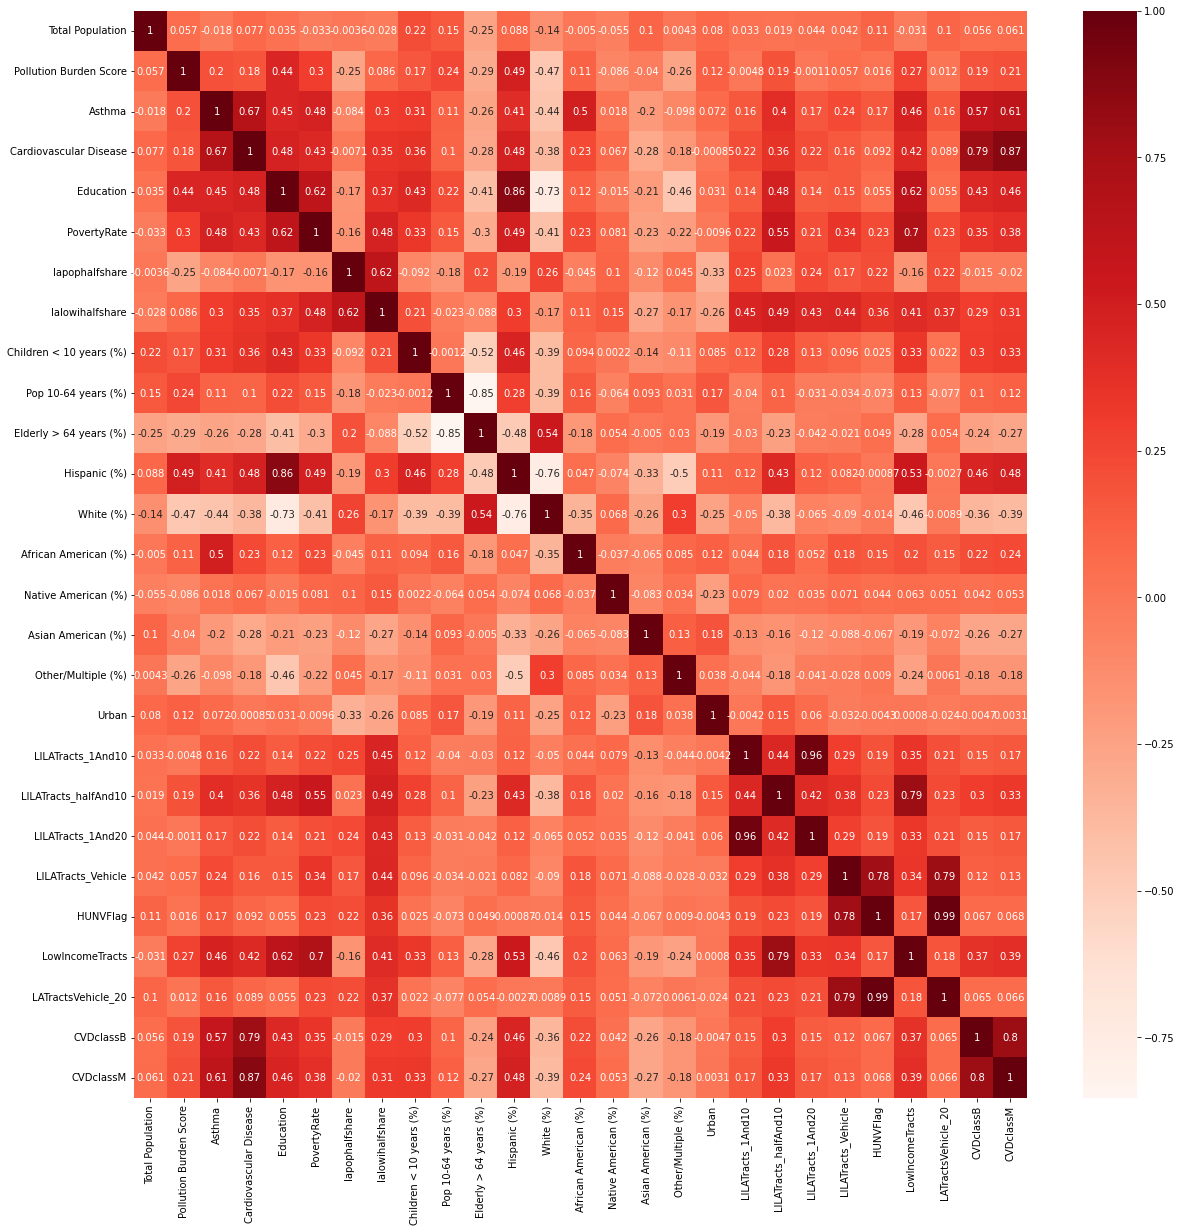

In [ ]:
#correlation heatmap
#Using Pearson Correlation

plt.figure(figsize=(20,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#HUNVFlag and LATractsVehicle_20 should not be in the model together due to high correlation.

In [ ]:
#VIF, if above 10 ----> feature should be removed
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = data.columns
vif["vif_Factor"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif
#https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea

features    vif_Factor
0          Total Population  6.798828e+00
1    Pollution Burden Score  1.683550e+01
2                    Asthma  1.004278e+01
3    Cardiovascular Disease  4.195894e+01
4                 Education  1.381030e+01
5               PovertyRate  8.594606e+00
6            lapophalfshare  1.351577e+01
7           lalowihalfshare  1.105134e+01
8   Children < 10 years (%)  3.841834e+04
9       Pop 10-64 years (%)  1.221077e+06
10   Elderly > 64 years (%)  6.825865e+04
11             Hispanic (%)  4.684333e+05
12                White (%)  5.197872e+05
13     African American (%)  2.396362e+04
14      Native American (%)  6.757579e+02
15       Asian American (%)  9.674394e+04
16       Other/Multiple (%)  3.887528e+03
17                    Urban  1.761144e+01
18        LILATracts_1And10  1.597226e+01
19     LILATracts_halfAnd10  5.230339e+00
20        LILATracts_1And20  1.572975e+01
21       LILATracts_Vehicle  3.433414e+00
22                 HUNVFlag  5.366997e+01
23          LowIncomeTracts  7.858110e+00
24       LATractsVehicle_20  5.627994e+01
25                CVDclassB  6.273869e+00
26                CVDclassM  1.331181e+01

#Encoding and Splitting for Decision Tree Model

###Split Data into Test and Train!

In [ ]:
#using train_test_split we can split the data into TRAIN and TEST data sets

TRAIN, TEST = train_test_split(data, test_size=0.25, random_state=101)

In [ ]:
TRAIN.head()
TRAIN.shape
#5643 training records!

(5290, 27)

In [ ]:
TEST.head()
TEST.shape

(1764, 27)

#**Building & Developing Various Models!**

##*Model 1:*

---

#### Binary

In [ ]:
x_train = TRAIN[['Total Population', 'Pollution Burden Score', 'Asthma', 'Education', 'PovertyRate', 'lapophalfshare',
       'lalowihalfshare', 'Children < 10 years (%)', 'Pop 10-64 years (%)', 'Elderly > 64 years (%)', 'Hispanic (%)', 'White (%)',
       'African American (%)', 'Native American (%)', 'Asian American (%)','Other/Multiple (%)', 'Urban', 'LILATracts_1And10',
       'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle','HUNVFlag', 'LowIncomeTracts']].copy()
y_train = TRAIN['CVDclassB'].copy()

In [ ]:
x_test = TEST[['Total Population', 'Pollution Burden Score', 'Asthma', 'Education', 'PovertyRate', 'lapophalfshare',
       'lalowihalfshare', 'Children < 10 years (%)', 'Pop 10-64 years (%)', 'Elderly > 64 years (%)', 'Hispanic (%)', 'White (%)',
       'African American (%)', 'Native American (%)', 'Asian American (%)', 'Other/Multiple (%)', 'Urban', 'LILATracts_1And10',
       'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle','HUNVFlag', 'LowIncomeTracts']].copy()
y_test = TEST['CVDclassB'].copy()

In [ ]:
x_test.shape

(1764, 23)

In [ ]:
y_train.value_counts()

0    2648
1    2642
Name: CVDclassB, dtype: int64

In [ ]:
data.head()

Total Population  Pollution Burden Score  Asthma  Cardiovascular Disease  \
0              3433                    3.40   17.89                    4.48   
1              2526                    2.48   11.87                    5.76   
2              2748                    5.67   11.25                    6.47   
3              5969                    4.21   22.74                    6.19   
4              2273                    3.22   27.02                    5.46   

   Education  PovertyRate  lapophalfshare  lalowihalfshare  \
0        1.7         10.7           100.0             12.5   
1        2.6         10.7            81.2             13.7   
2        1.6         10.4           100.0             12.2   
3        3.8         10.5            99.8             22.0   
4        2.7         11.8            95.6             12.2   

   Children < 10 years (%)  Pop 10-64 years (%)  ...  Urban  \
0                     7.31                66.56  ...      0   
1                     9.34                52.53  ...      1   
2                     9.13                64.19  ...      1   
3                    15.10                71.74  ...      1   
4                     6.12                77.52  ...      0   

   LILATracts_1And10  LILATracts_halfAnd10  LILATracts_1And20  \
0                  0                     0                  0   
1                  0                     0                  0   
2                  0                     0                  0   
3                  0                     0                  0   
4                  0                     0                  0   

   LILATracts_Vehicle  HUNVFlag  LowIncomeTracts  LATractsVehicle_20  \
0                   0         0                0                   0   
1                   0         0                0                   0   
2                   0         0                0                   0   
3                   0         0                0                   0   
4                   0         0                0                   0   

   CVDclassB  CVDclassM  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 27 columns]

In [ ]:
y_test.value_counts()

0    909
1    855
Name: CVDclassB, dtype: int64

In [ ]:
dtree1 = DecisionTreeClassifier(criterion= 'entropy', random_state=101, max_depth=5, min_samples_split=15)
dtree1.fit(x_train, y_train)
y_pred=dtree1.predict(x_test)

In [ ]:
dtree1
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[691, 218],
       [126, 729]])

In [ ]:
matrix = confusion_matrix(y_test, y_pred).ravel()

print("TRUE NEGATIVE:")
print(matrix[0])
print("======")
print("FALSE POSITIVE:")
print(matrix[1])
print("======")
print("FALSE NEGATIVE:")
print(matrix[2])
print("======")
print("TRUE POSITIVE:")
print(matrix[3])

TRUE NEGATIVE:
691
FALSE POSITIVE:
218
FALSE NEGATIVE:
126
TRUE POSITIVE:
729


In [ ]:
#accuracy
accuracy_score(y_test, y_pred, normalize=False)
accuracy_score(y_test, y_pred)

0.8049886621315193

In [ ]:
accuracy_score(y_test, y_pred, normalize=False)

1420

In [ ]:
#precision
precision_score(y_test, y_pred)

0.7697993664202746

In [ ]:
#recall
recall_score(y_test, y_pred)

0.8526315789473684

In [ ]:
#f1score
f1_score(y_test, y_pred)

0.8091009988901222

In [ ]:
#accuracy, precision, recall, f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       909
           1       0.77      0.85      0.81       855

    accuracy                           0.80      1764
   macro avg       0.81      0.81      0.80      1764
weighted avg       0.81      0.80      0.80      1764



In [ ]:
#AUC Value

auc = roc_auc_score(y_test,y_pred)
print(auc)

0.8064037982745643


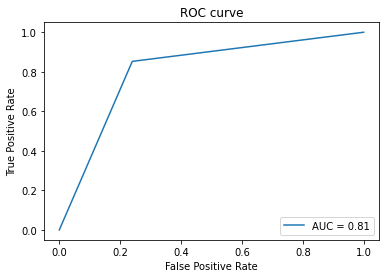

In [ ]:
#ROC Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.title('ROC curve')
plt.show()

##**MODEL 1 PREDICITON**

In [ ]:
#predicting

dtree1.fit(x_train.values, y_train.values)
y_pred=dtree1.predict(x_test.values)

new = [[15387, 5, 37.2, 86.2, 19.4, 92.95, 36.23, 19.1, 73.3, 7.6, 57.9, 14.5, 25.6, 0, 0, 2.5, 1, 0, 0, 0, 0, 1, 0]]
y_pred = dtree1.predict(new)
print(y_pred)

[1]


##*Model 2:*

---

#### Binary (and removing features with high correlation)

In [ ]:
x_train = TRAIN[['Total Population', 'Pollution Burden Score', 'Education', 'PovertyRate',
       'lalowihalfshare', 'Children < 10 years (%)', 'Pop 10-64 years (%)', 'Elderly > 64 years (%)', 'Hispanic (%)', 'White (%)',
       'African American (%)', 'Native American (%)', 'Asian American (%)','Other/Multiple (%)', 'Urban',
       'LILATracts_halfAnd10','HUNVFlag']].copy()
y_train = TRAIN['CVDclassB'].copy()

In [ ]:
x_test = TEST[['Total Population', 'Pollution Burden Score', 'Education', 'PovertyRate',
       'lalowihalfshare', 'Children < 10 years (%)', 'Pop 10-64 years (%)', 'Elderly > 64 years (%)', 'Hispanic (%)', 'White (%)',
       'African American (%)', 'Native American (%)', 'Asian American (%)','Other/Multiple (%)', 'Urban',
       'LILATracts_halfAnd10','HUNVFlag']].copy()
y_test = TEST['CVDclassB'].copy()

In [ ]:
dtree2 = DecisionTreeClassifier(criterion= 'entropy', random_state=101, max_depth=10, min_samples_split=20)
dtree2.fit(x_train, y_train)
y_pred=dtree2.predict(x_test)

In [ ]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[669, 240],
       [266, 589]])

In [ ]:
#accuracy
accuracy_score(y_test, y_pred)

0.7131519274376418

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       909
           1       0.71      0.69      0.70       855

    accuracy                           0.71      1764
   macro avg       0.71      0.71      0.71      1764
weighted avg       0.71      0.71      0.71      1764



##*Model 3:*

---

#### Multi-Classification

In [ ]:
x_train = TRAIN[['Total Population', 'Pollution Burden Score', 'Asthma', 'Education', 'PovertyRate', 'lapophalfshare',
       'lalowihalfshare', 'Children < 10 years (%)', 'Pop 10-64 years (%)', 'Elderly > 64 years (%)', 'Hispanic (%)', 'White (%)',
       'African American (%)', 'Native American (%)', 'Asian American (%)','Other/Multiple (%)', 'Urban', 'LILATracts_1And10',
       'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle','HUNVFlag', 'LowIncomeTracts']].copy()
y_train = TRAIN['CVDclassM'].copy()

In [ ]:
x_test = TEST[['Total Population', 'Pollution Burden Score', 'Asthma', 'Education', 'PovertyRate', 'lapophalfshare',
       'lalowihalfshare', 'Children < 10 years (%)', 'Pop 10-64 years (%)', 'Elderly > 64 years (%)', 'Hispanic (%)', 'White (%)',
       'African American (%)', 'Native American (%)', 'Asian American (%)', 'Other/Multiple (%)', 'Urban', 'LILATracts_1And10',
       'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle','HUNVFlag', 'LowIncomeTracts']].copy()
y_test = TEST['CVDclassM'].copy()

In [ ]:
dtree3 = DecisionTreeClassifier(criterion= 'entropy', random_state=101, max_depth=15, min_samples_split=30)
dtree3.fit(x_train, y_train)
y_pred=dtree3.predict(x_test)

In [ ]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[349, 171,  30],
       [117, 361, 182],
       [ 19, 158, 377]])

In [ ]:
#accuracy
accuracy_score(y_test, y_pred)

0.6162131519274376

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.63      0.67       550
           1       0.52      0.55      0.53       660
           2       0.64      0.68      0.66       554

    accuracy                           0.62      1764
   macro avg       0.63      0.62      0.62      1764
weighted avg       0.62      0.62      0.62      1764



##**MODEL 3 PREDICITION**

In [ ]:
#predicting

dtree3.fit(x_train.values, y_train.values)
y_pred=dtree3.predict(x_test.values)

new = [[15387, 5, 37.2, 86.2, 19.4, 92.95, 36.23, 19.1, 73.3, 7.6, 57.9, 14.5, 25.6, 0, 0, 2.5, 1, 0, 0, 0, 0, 1, 0]]
y_pred = dtree3.predict(new)
print(y_pred)

[2]


##*Model 4:*

---

#### Multi-Classification (and removing features with high correlation)

In [ ]:
x_train = TRAIN[['Total Population', 'Pollution Burden Score', 'Education', 'PovertyRate',
       'lalowihalfshare', 'Children < 10 years (%)', 'Pop 10-64 years (%)', 'Elderly > 64 years (%)', 'Hispanic (%)', 'White (%)',
       'African American (%)', 'Native American (%)', 'Asian American (%)','Other/Multiple (%)', 'Urban',
       'LILATracts_halfAnd10','HUNVFlag']].copy()
y_train = TRAIN['CVDclassM'].copy()

In [ ]:
x_test = TEST[['Total Population', 'Pollution Burden Score', 'Education', 'PovertyRate',
       'lalowihalfshare', 'Children < 10 years (%)', 'Pop 10-64 years (%)', 'Elderly > 64 years (%)', 'Hispanic (%)', 'White (%)',
       'African American (%)', 'Native American (%)', 'Asian American (%)','Other/Multiple (%)', 'Urban',
       'LILATracts_halfAnd10','HUNVFlag']].copy()
y_test = TEST['CVDclassM'].copy()

In [ ]:
dtree4 = DecisionTreeClassifier(criterion= 'entropy', random_state=101, max_depth=15, min_samples_split=30)
dtree4.fit(x_train, y_train)
y_pred=dtree4.predict(x_test)

In [ ]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[287, 192,  71],
       [187, 283, 190],
       [ 53, 167, 334]])

In [ ]:
#accuracy
accuracy_score(y_test, y_pred)

0.5124716553287982

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.52      0.53       550
           1       0.44      0.43      0.43       660
           2       0.56      0.60      0.58       554

    accuracy                           0.51      1764
   macro avg       0.52      0.52      0.52      1764
weighted avg       0.51      0.51      0.51      1764



#**MODEL #1 has the BEST performance!**

---

This model contains the most features and utilizes a binary classifier! Additionally, for the multi-class models, the model with the most features performs better than the one with less features.

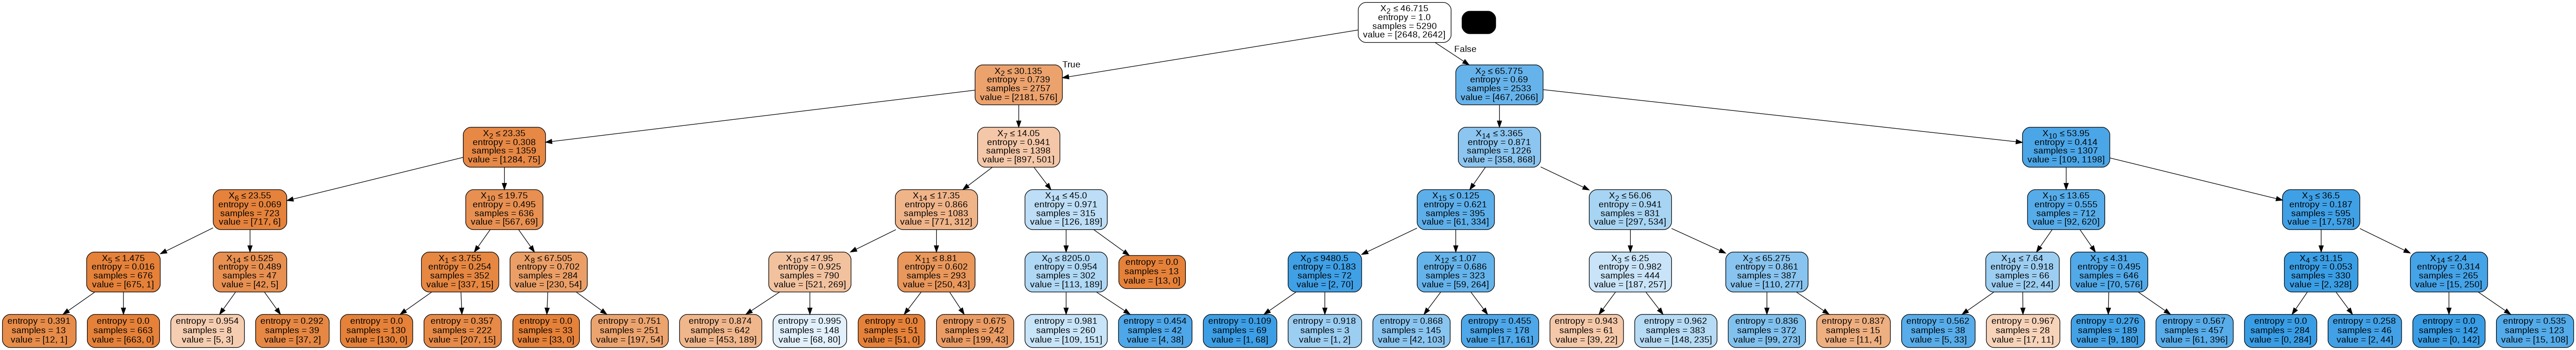

In [ ]:
#visualizing best decision trees

dot_data = StringIO()

export_graphviz(dtree1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

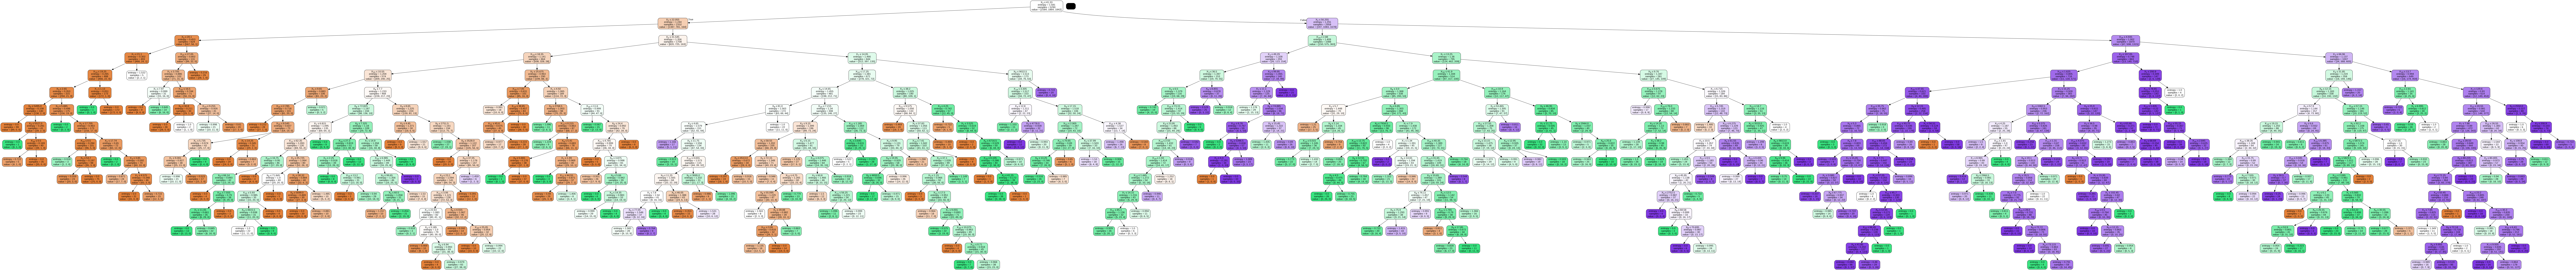

In [ ]:
dot_data = StringIO()

export_graphviz(dtree3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())